In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
BASE_PATH = '/content/drive/Shared drives/Citadel Datathon 2020 Summer/datasets'
UK_HOUSE_PRICE_CSV = 'UK_house_price.csv'
UK_HOUSE_SALES_VOLUME_CSV = 'UK_house_sales_volume.csv'

In [ ]:
price = pd.read_csv(os.path.join(BASE_PATH, UK_HOUSE_PRICE_CSV))
vol = pd.read_csv(os.path.join(BASE_PATH, UK_HOUSE_SALES_VOLUME_CSV))

In [ ]:
price.index = pd.to_datetime(price['Unnamed: 0'])
price = price.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 34',  'Unnamed: 37',  'Unnamed: 47'])

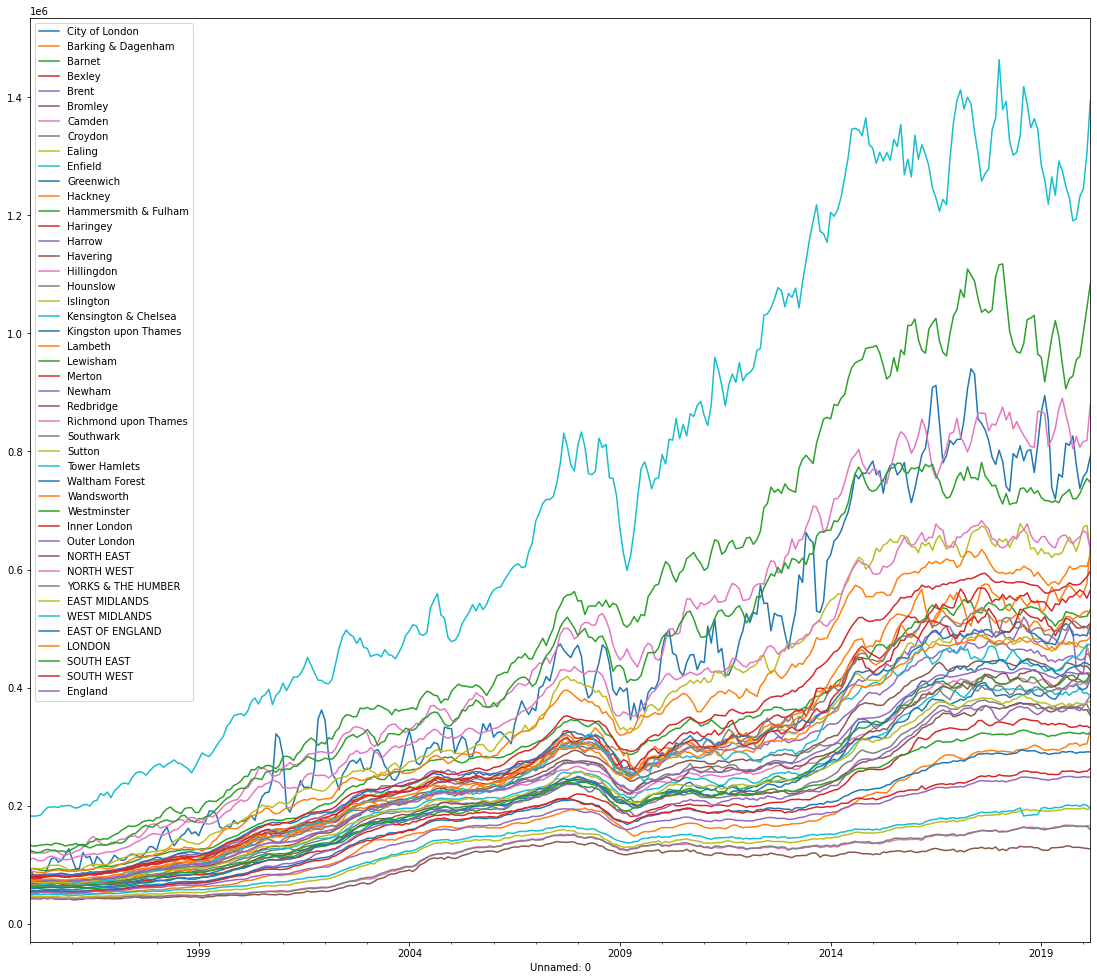

In [ ]:
price.plot(figsize=(19,17))

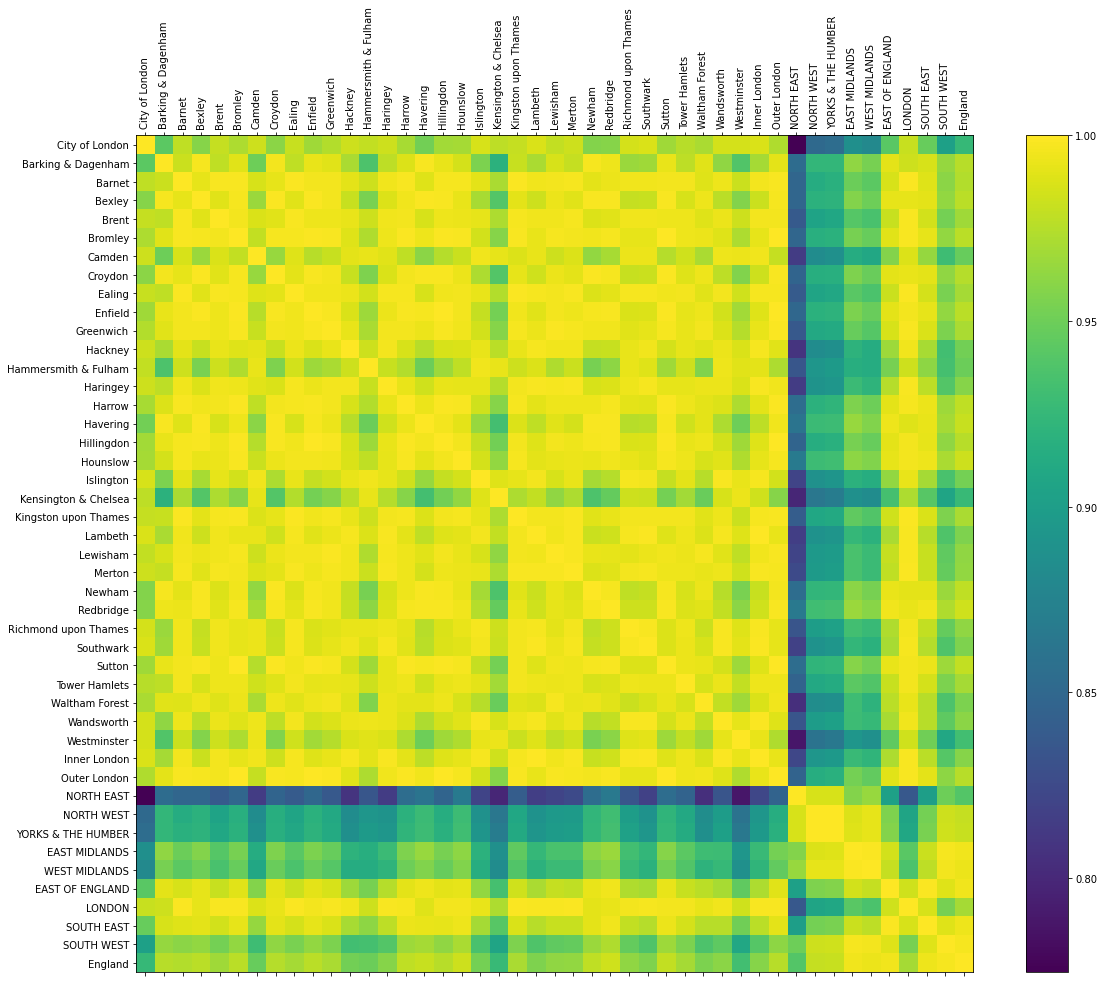

In [ ]:
def plot_corr(df):
  corr = df.corr() 
  f = plt.figure(figsize=(19, 15))
  plt.matshow(corr, fignum=f.number)
  plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
  plt.yticks(range(len(corr)), corr.columns)
  plt.colorbar()

plot_corr(price)

In [ ]:
vol.index = pd.to_datetime(vol['Unnamed: 0.1'])
vol = vol.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 34',  'Unnamed: 37',  'Unnamed: 47'])

In [ ]:
 vol = vol.iloc[1:, :]

In [ ]:
vol = vol.astype(int)

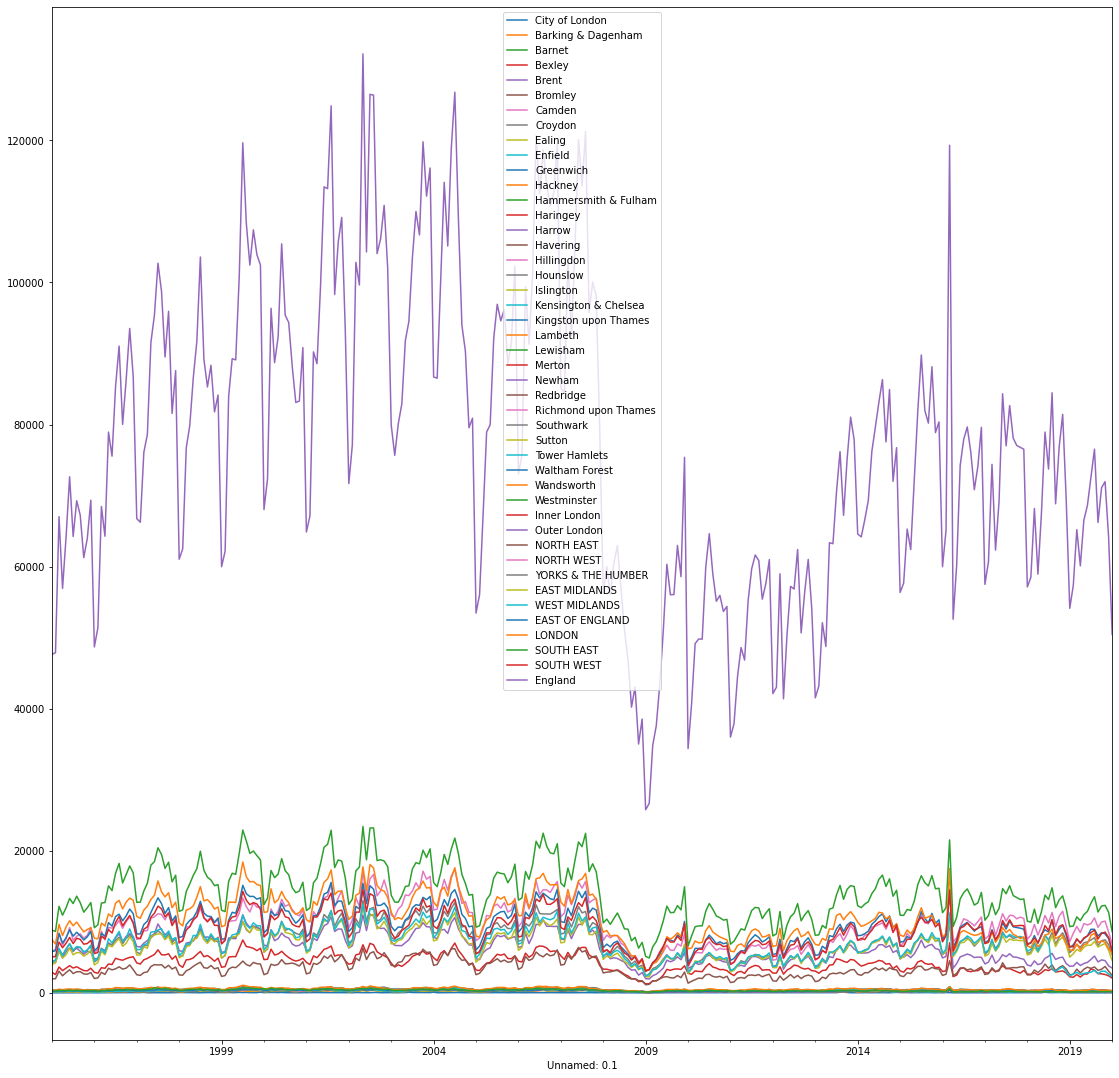

In [ ]:
vol.plot(figsize = (19, 19))

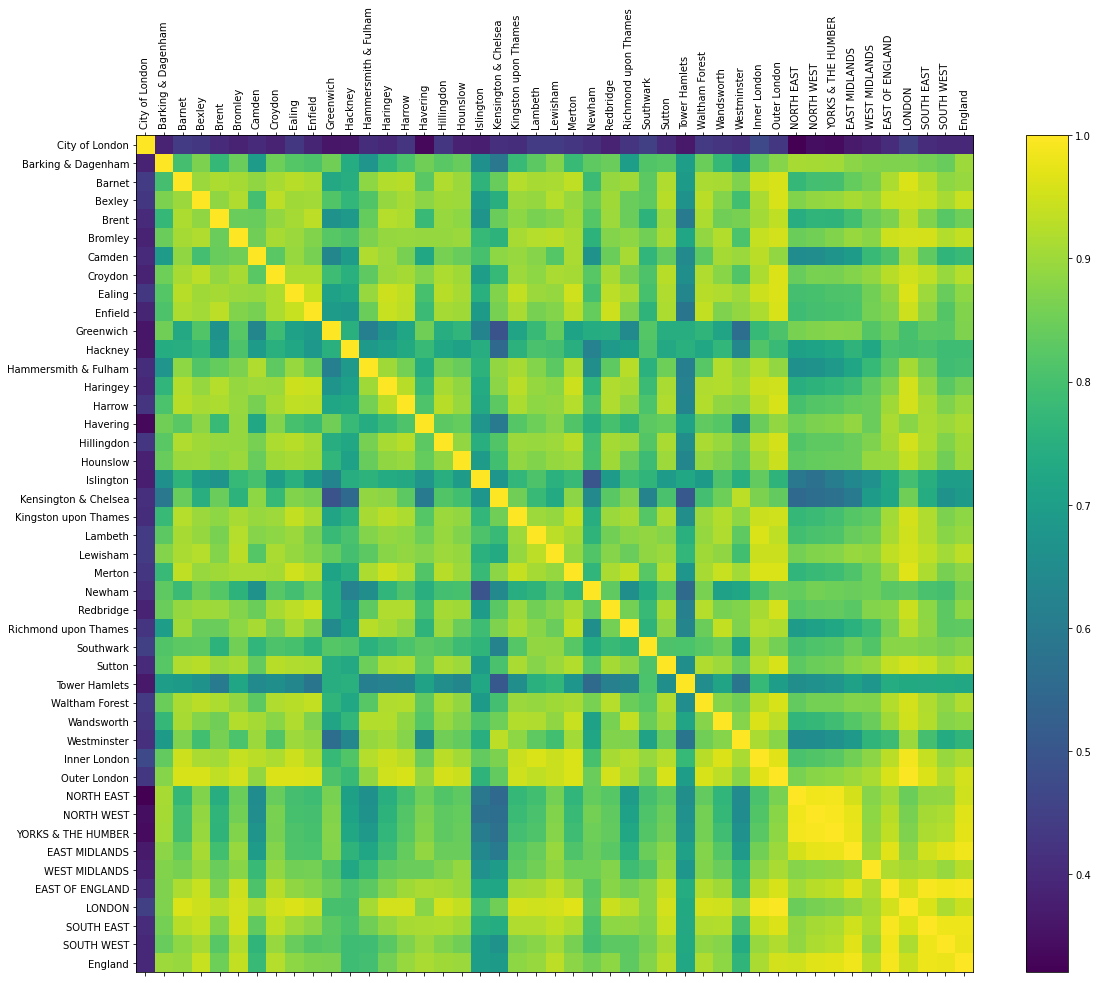

In [ ]:
plot_corr(vol)

In [ ]:
price.tail()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,London_England_ratio,Ratio_monthly_change
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-01,776894.3978,306390.2643,522639.0128,333657.4832,432187.6972,436079.6255,825336.3136,367584.5609,475491.5952,393255.1074,405336.9018,559757.7154,719751.4006,559425.8856,450108.5884,365861.0685,407706.2833,410070.8716,630659.4611,1194049.928,490420.0841,519409.5672,415892.7499,501570.2213,363114.2225,413881.7568,650948.5387,510619.3086,374774.8152,450988.6885,435567.6807,601649.5293,9.552646e+05,573931.9814,423311.0108,129658.4388,165808.1217,164499.3461,194855.2266,200895.6464,288781.4440,468982.7556,322511.7242,256874.8635,247950.7076,3.133261,-0.056732
2019-12-01,737275.0265,301283.4446,519306.2450,336301.8720,427126.3498,438681.8110,807124.1868,369567.8832,469662.0338,400182.3926,398024.3786,552784.8607,728698.0572,565582.0610,446899.5423,365885.5708,404843.1664,409569.3406,648968.8895,1231764.562,487696.1182,521705.2055,413462.2400,500651.1159,360934.0315,424631.0449,655377.8496,505499.1431,372581.4288,456436.0060,437333.4162,605559.8685,9.609431e+05,575132.0771,423155.8149,129504.1251,164892.6302,165818.1099,194552.6740,198644.0558,290813.7560,478576.3217,321971.5268,256576.8481,248250.3133,2.969886,-0.053551
2020-01-01,757376.6940,304187.4777,520115.3645,334430.3788,424662.7313,435337.2775,816905.7688,371917.9504,467351.3598,390574.9067,396725.7236,560643.7849,742390.2287,561554.6448,447786.1890,361905.2519,407688.4619,410270.5966,671870.8296,1245019.529,489615.3191,527596.9903,409271.6290,503834.1141,368244.6859,423586.8046,665796.7103,500395.2299,372145.0259,464737.0236,442368.0916,606270.8442,1.001284e+06,580889.5391,422977.4113,128425.2794,165023.6027,164838.1774,196277.2137,202289.4086,290547.8939,479165.8504,323967.4051,258185.0272,249159.7397,3.039723,0.023243
2020-02-01,765416.3767,304719.3044,520965.8009,334845.2535,471573.6590,436543.8436,818558.3621,371685.7616,467962.5594,391100.2855,399806.4009,575906.8986,754149.6245,551359.6125,457363.9002,362665.4717,404694.4417,408460.1771,674947.8960,1304329.997,487604.2924,529832.2143,413063.0806,502533.4230,377364.6431,424049.3173,661396.3634,504045.2878,373843.1005,473409.7007,441460.9779,605237.3120,1.042884e+06,587586.2107,425242.5947,127741.1311,165916.5144,165232.0871,193858.4385,200576.6553,291260.7302,479974.2800,321268.2183,258128.7357,248587.3062,3.079065,0.012859
2020-03-01,792582.6403,327135.6552,532568.9463,331679.4193,446966.2789,430032.8209,881095.9609,358355.7712,454027.3472,386000.1079,415692.6794,638683.1367,747174.3798,565342.5171,454715.5652,352951.3302,417977.1768,423042.3779,632269.5500,1396102.237,505999.7313,525487.0947,424232.5948,509251.5409,387326.2293,418472.6882,633480.5120,488609.5541,377458.4757,472661.8092,437153.3074,624858.0963,1.085013e+06,597616.8226,424295.1494,126944.7083,166202.0156,159208.1597,194664.1134,195917.0554,291253.8878,485794.0806,323353.0524,263360.0167,248271.1877,3.192407,0.036149


In [ ]:
vol.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995-01-01,17,96,332,269,233,323,198,375,303,327,182,131,227,226,221,203,202,175,90,324,213,227,211,219,168,268,208,182,218,147,249,403,339,2890,4616,1983,5801,4489,3990,4199,5812,7506,8809,5050,47639
1995-02-01,7,95,327,207,220,326,194,342,242,302,174,115,185,223,175,198,256,145,102,207,185,207,206,204,189,277,212,169,177,149,226,379,251,2583,4290,1986,6129,4349,4211,4633,5928,6873,8658,5113,47880
1995-03-01,14,144,384,318,320,449,207,447,377,437,206,159,265,317,249,282,337,263,140,318,221,315,300,275,294,385,307,270,319,166,276,513,365,3643,5996,3052,8375,6149,5840,6262,8374,9639,12177,7157,67025
1995-04-01,7,109,304,253,249,362,174,377,270,337,176,141,258,244,216,297,255,211,125,293,194,288,227,230,217,317,249,169,268,204,253,451,328,3126,4927,2406,6714,5338,4892,5218,7004,8053,10941,6359,56925
1995-05-01,10,149,393,317,293,428,220,449,345,393,216,138,233,330,244,297,279,233,139,274,229,309,311,269,284,399,289,212,310,186,281,517,317,3480,5813,2857,7641,6200,5377,6094,7765,9293,11975,6990,64192


## Hypothesis Testing

In [43]:
price['London_England_ratio'] = price['LONDON']/price['England']

In [44]:
import scipy.stats as stats
sample_1 = price[price.index <= pd.to_datetime('2012-01-01')]['London_England_ratio']
sample_2 = price[price.index > pd.to_datetime('2012-01-01')]['London_England_ratio']

In [45]:
stats.ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-25.939699179373324, pvalue=9.929696710889998e-79)

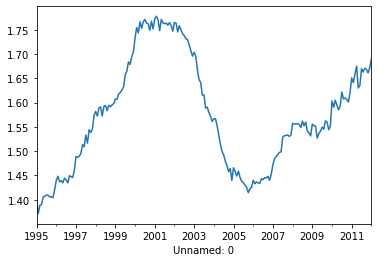

In [46]:
sample_1.plot()

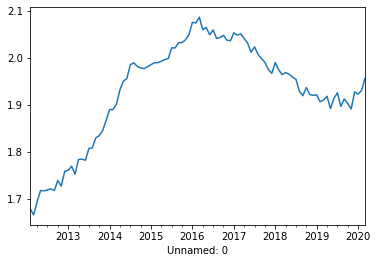

In [47]:
sample_2.plot()

In [48]:
price['Ratio_monthly_change'] = np.log(price['London_England_ratio']).diff()

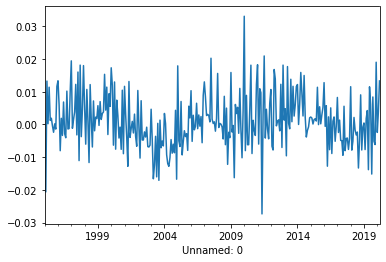

In [49]:
price.Ratio_monthly_change.plot()

In [50]:
from statsmodels.stats.diagnostic import acorr_ljungbox


In [51]:
lb_test = acorr_ljungbox(price.London_England_ratio[120:158], lags = 10)
print(lb_test[1])

[4.58488426e-09 2.31876163e-14 8.65279904e-19 2.14951327e-22
 4.14351047e-25 6.36379609e-27 8.38881422e-28 6.69160311e-28
 1.15987294e-27 3.55134464e-27]
